In [1]:
from scipy import signal
from scipy.io import wavfile

import numpy as np

import matplotlib.pyplot as plt

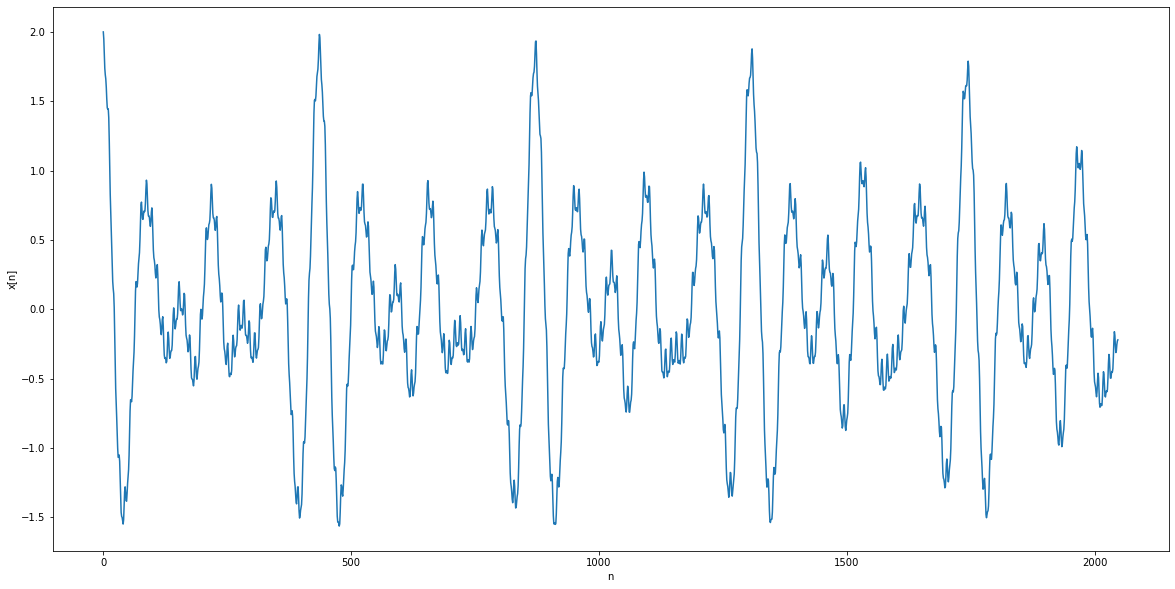

In [2]:
fs = 48000
N = 2048

f0 = 440
f1 = 554
f2 = 660
f3 = 880
f4 = 4400
f5 = 8800

A0 = 0.6
A1 = 0.55
A2 = 0.55
A3 = 0.15
A4 = 0.1
A5 = 0.05

# n variando de 0 a 2048
n = np.arange(N)

# Definindo as frequencias
freqmax = fs
freqmin = 0

freqhop = (freqmax - freqmin)/N


# O sinal de teste, x, eh um combinacao de cosenoides de diferentes periodos
x = np.multiply(A0, np.cos(np.multiply(2*(np.pi)*f0/fs, n))) + np.multiply(A1, np.cos(np.multiply(2*(np.pi)*f1/fs, n))) \
    + np.multiply(A2, np.cos(np.multiply(2*(np.pi)*f2/fs, n))) + np.multiply(A3, np.cos(np.multiply(2*(np.pi)*f3/fs, n))) \
    + np.multiply(A4, np.cos(np.multiply(2*(np.pi)*f4/fs, n))) + np.multiply(A5, np.cos(np.multiply(2*(np.pi)*f5/fs, n)))

plt.figure(figsize=(20,10))
plt.plot(n, x)
plt.ylabel('x[n]')
plt.xlabel('n')
plt.show()

In [3]:
def sine_window(N):
    M = N//2
    w = np.zeros((N,1))

    for n in range(N-M):
        w[n] = np.sin((np.pi/2)*(n+1/2)/(N-M))
        
    for n in range(N-M,M):
        w[n] = 1

    for n in range(M,N):
        w[n] = np.sin((np.pi/2)*(N - n - 1/2)/(N-M))

    return w.reshape(-1)

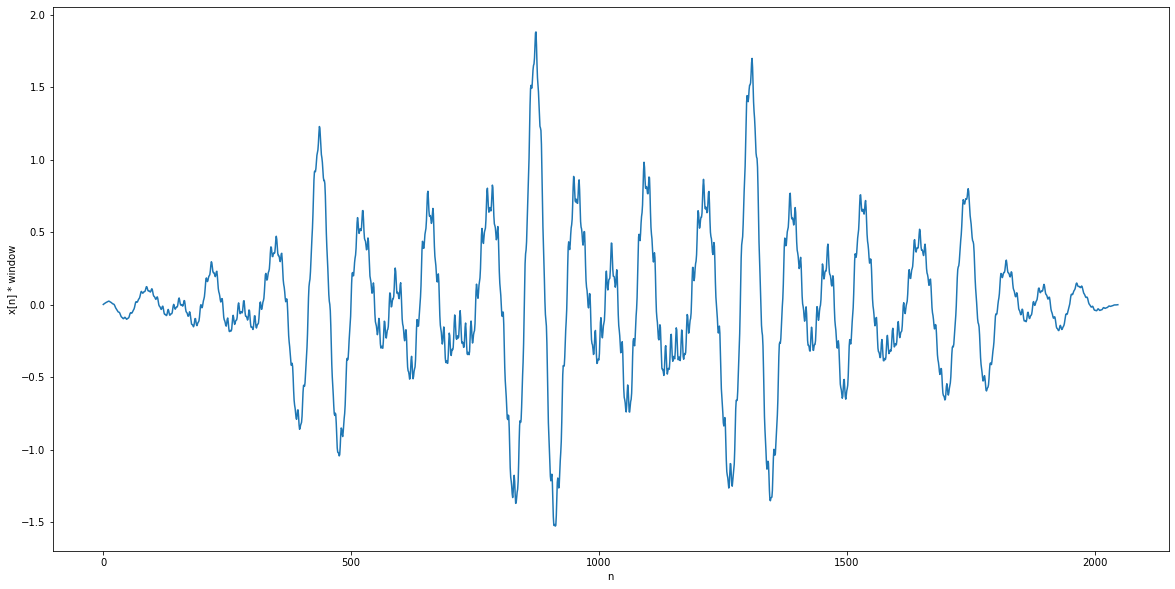

In [4]:
w = sine_window(N)
windowed = x * w

plt.figure(figsize=(20,10))
plt.plot(n, windowed)
plt.ylabel('x[n] * window')
plt.xlabel('n')
plt.show()

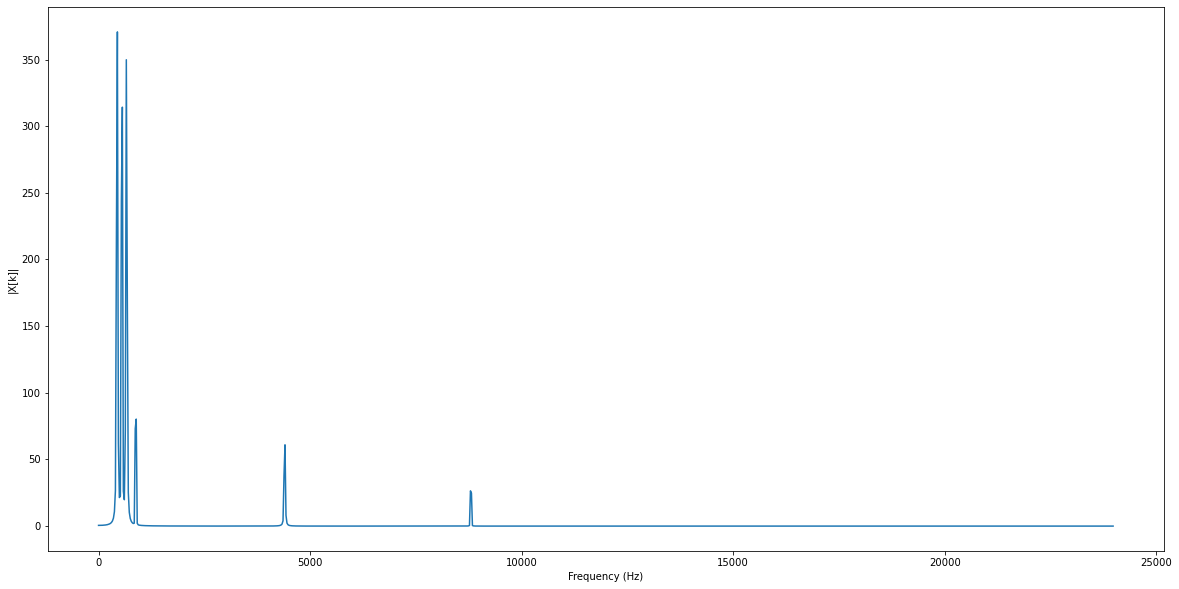

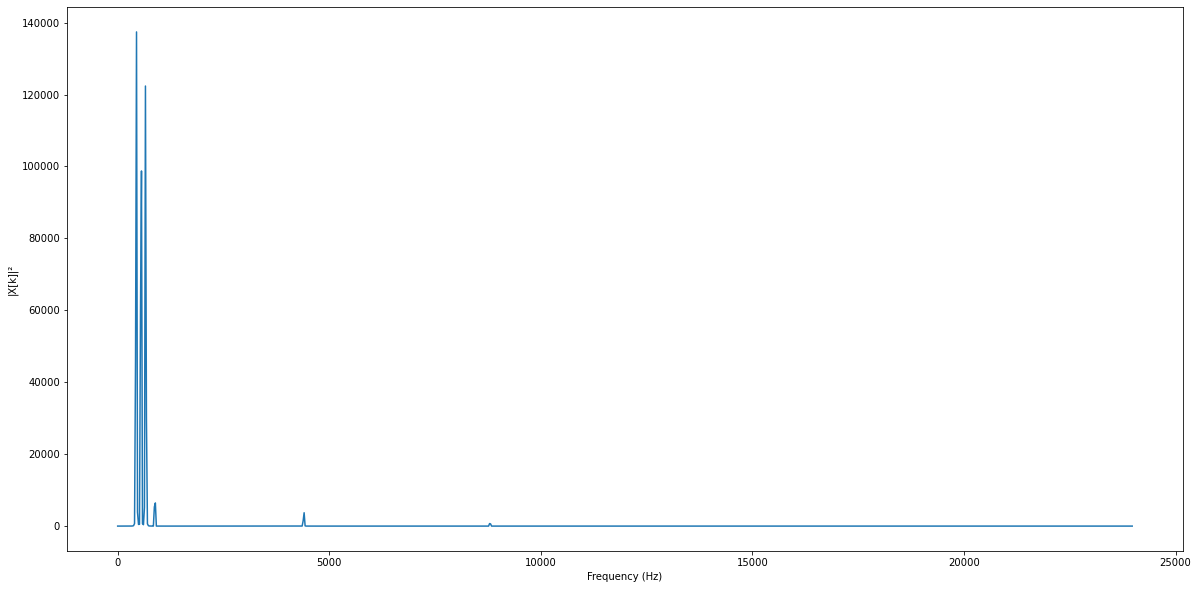

In [5]:
freq = np.dot(freqhop, n)

x_fft = np.fft.fft(windowed)

freq = freq[:-N//2]
x_fft = x_fft[:-N//2]

plt.figure(figsize=(20,10))
plt.plot(freq, abs(x_fft))
plt.ylabel('|X[k]|')
plt.xlabel('Frequency (Hz)')
plt.show()


x_fft_2 = abs(x_fft) ** 2

plt.figure(figsize=(20,10))
plt.plot(freq, x_fft_2)
plt.ylabel('|X[k]|²')
plt.xlabel('Frequency (Hz)')
plt.show()

In [16]:
peaks, _ = signal.find_peaks(x_fft_2)
print(peaks)

[ 19  24  28  38 188 375]


In [17]:
peaks_minus1 = [i-1 for i in peaks]
print(freq[peaks_minus1])
print(freq[peaks])

[ 421.875   539.0625  632.8125  867.1875 4382.8125 8765.625 ]
[ 445.3125  562.5     656.25    890.625  4406.25   8789.0625]


In [18]:
def amp2spl(x_fft_2, N):
    return 96 + np.dot(10, np.log10(np.dot((8 / ((N ** 2))), x_fft_2)))

In [24]:
def spl(peaks, peaks_minus1, N):
    return 96 + np.dot(10, np.log10(np.dot((8 / ((N ** 2))), peaks + peaks_minus1)))

In [19]:
SPL = amp2spl(x_fft_2, N)
print(SPL)

[ 33.45342527  33.52922125  33.75627409 ... -55.74365175 -55.81435488
 -55.85733442]


In [20]:
freq[peaks]

array([ 445.3125,  562.5   ,  656.25  ,  890.625 , 4406.25  , 8789.0625])

In [29]:
def get_umbrella(array, index, umbrella=4):
    return array[index - umbrella//2 : index + umbrella//2 + 1]
def fft_to_db(fft, index, umbrella=4):
    peaks = get_umbrella(fft,index,umbrella)
    return peaks_to_db(peaks, len(fft))
def amplitude_to_db(amplitude):
    ##20log_10(amplitude/factor)
    fator = 1/(10 ** 4.8)
    return 20*np.log10(amplitude/fator)
def peaks_to_db(peaks, N=2048):
    k = np.sum(np.abs(peaks)**2)/((N**2)/8)
    return 96 + 10*np.log10(k)

$$
SPL\{f=440\}=91.54dB
$$
$$
SPL\{f=554\}=90.82dB
$$
$$
SPL\{f=660\}=90.79dB
$$
$$
SPL\{f=880\}=79.52dB
$$
$$
SPL\{f=4400\}=75.99dB
$$
$$
SPL\{f=8800\}=69.68dB
$$

In [25]:
print(spl(x_fft_2[peaks], x_fft_2[peaks_minus1], N))

[91.43470409 90.79435284 89.86163281 79.51840484 75.92402933 67.24859878]


$$
SPL\{f=440\} = 20\log(A_0/a_0)=91.56dB
$$
$$
SPL\{f=554\}=20\log(A_1/a_0)=90.81dB
$$
$$
SPL\{f=660\}=20\log(A_2/a_0)=90.81dB
$$
$$
SPL\{f=880\}=20\log(A_3/a_0)=79.52dB
$$
$$
SPL\{f=4400\}=20\log(A_4/a_0)=76.0dB
$$
$$
SPL\{f=8800\}=20\log(A_5/a_0)=69.98dB
$$

In [22]:
print(SPL[peaks])
print(SPL[peaks_minus1])

[90.18480498 88.74983713 89.68114822 76.89471946 74.50468658 67.24734545]
[85.41563905 86.54018637 75.95826105 76.08368007 70.37669814 31.85077839]


In [37]:
peaks

array([ 19,  24,  28,  38, 188, 375])

In [36]:
print([fft_to_db(x_fft, p, umbrella=3) for p in peaks])

[97.54569974247933, 96.833678217974, 96.79402680398844, 85.54065641301598, 81.99898611428112, 75.99925404205766]


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(freq, SPL)
plt.plot(freq[peaks], SPL[peaks], marker ='o', ls='')
plt.ylabel('SPL (dB)')
plt.xlabel('Frequency (Hz)')
plt.show()